# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

(784, 784)
Rank:
480


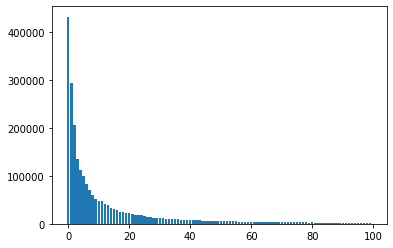

In [160]:
# Samples corresponding to the last digit of your roll number (plot a)
from numpy import linalg 
data = []
for i in range(len(train_labels)):
    if train_labels[i] ==7.0:
        data.append(train_data[i])
dat = np.array(data)
print (np.shape(np.cov(np.array(data).T)))
eig, vector = linalg.eig(np.cov(np.array(data).T))
#eig.shape
plt.bar(np.arange(100),eig[:100])
print ("Rank:")
print(linalg.matrix_rank(np.diag(eig)))
        

(784, 784)
Rank:
520


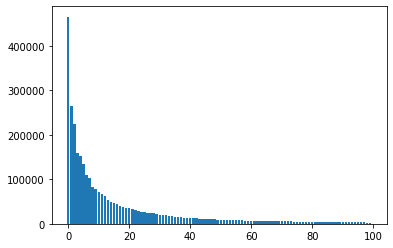

In [161]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
 
data = []
for i in range(len(train_labels)):
    if train_labels[i] ==2.0:
        data.append(train_data[i])
dat = np.array(data)
print (np.shape(np.cov(np.array(data).T)))
eig, vector = linalg.eig(np.cov(np.array(data).T))
eig.shape
plt.bar(np.arange(100),eig[:100])
print("Rank:")
print(linalg.matrix_rank(np.diag(eig)))

(784, 784)
Rank:
658


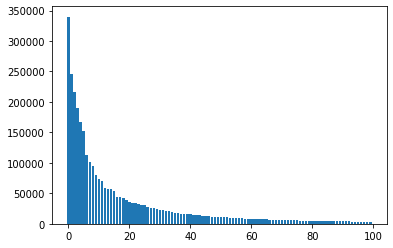

In [163]:
# All training data (plot c)

dat = np.array(train_data)
print (np.shape(np.cov(np.array(train_data).T)))
eig, vector = linalg.eig(np.cov(np.array(train_data).T))
eig.shape
plt.bar(np.arange(100),eig[:100])
print("Rank:")
print(linalg.matrix_rank(np.diag(eig)))
#plt.bar(np.arange(len(eig)),eigVal)



(784, 784)
Rank:
621


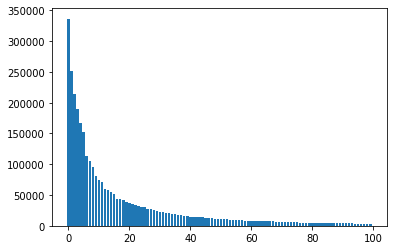

In [164]:
# Randomly selected 50% of the training data (plot d)


read50 = train_data
#random.sample(read_50, 392)
idx = np.random.choice(6000,3000)
m,n = read50.shape
read50 = read50[idx]
dat = np.array(read50)
print (np.shape(np.cov(np.array(read50).T)))
eig, vector = linalg.eig(np.cov(np.array(read50).T))
eig.shape
plt.bar(np.arange(100),eig[:100])
#plt.bar(np.arange(len(eig)),eigVal)
print ("Rank:")
print(linalg.matrix_rank(np.diag(eig)))

    


### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
Your answers here (double click to edit) 
1. Plots a and b are almost the same, due to the fact that the eigen values don't change much for different class labels of the data. 

2. Plots b and c are different since c plots the eigenspectrum for the entire class, while b does so for only one class. 

3. Using linalg(matrix_rank(diagonal elements)) gives the following ranks:
a -> 420
b -. 520
c -> 658

---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
Your answers here (double click to edit)
1. Since the image is binary, each pixel in the cell can have 2 values, 0 or 1. Since each image is a 28*28 pixel matrix, the number of possible images = $2^{784}$

2. Amount of training data available = $(6000/2^{784})*100$ because we have 6000 training images, and we have calculated the total number of possible images earlier. Similarily, we have 1000 test images, so there are $(1000/2^{784})*100$ percent of data available for testing.

3. All the eigen values would be the same, hence the eigenspectrum would be constant. The covariance matrix would be a diagonal matrix, with all the diagonal elements being positive. It is given that the images are binary, so every pixel will be either have a 0 or 1. Now, we can calculate the mean by adding nce the adding the matrices and dividing by the number of elements Using this, we can calculate the covariance matrix is given by $(x-u)(x-u)^T$. Now this matrix has diagonal elements that are squares on account of the outer product, thus being positive, regardless of the value of the mean. This makes all the eigen values equal to each other, thus making the eigenspectrum constant.




---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
Analytical answer here (double click to edit)
Multiplying by an orthonormal matrix is a rotation in terms of the graphical visualisation. The covariance matrix values tare given by $1/N*sum((x-u)(x-u)^T)$. Let A be the orthomormal matrix. When A is multiplied to the original data, we get the covariance matrix to be $1/N*sum((A*x-A*u)(A*x-A*u)^T)$. Taking A out of the expression, we get $1/N*sum(A*(x-u)(x-u)^T*A^{T})$. So now we have $A * sum((x-u)(x-u)^T) *A^{T}$. The new covariance matrix is $A*old covariance matrix*A^{T}$. Hence the new and old covariances matrices are similar (after using orthogonal property), hence the eigen values are the same. 

---

(784, 784)
(784, 784)


<BarContainer object of 100 artists>

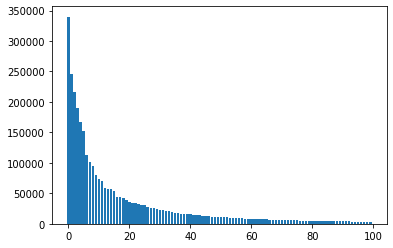

In [107]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.
# code goes here

from numpy.linalg import qr
n = 784
H = np.random.randn(n, n)
Q, R = qr(H)

ortho =(Q.dot(Q.T))
print (ortho.shape)
result = np.dot(train_data,ortho)
#result = np.dot(ortho,train_data.T)
dat = np.array(result)
print (np.shape(np.cov(np.array(result).T)))
eig, vector = linalg.eig(np.cov(np.array(result).T))
eig.shape
plt.bar(np.arange(100),eig[:100])

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
Your answer here (double click to edit)
When the samples are multiplies by 784*784 matrix of rank 1 or 2, the eigen values vanish because of the fact the resultant matrix also has rank 1 or 2. Since the sum of non zero eigenvalues is the rank, we can can say that the eigen spectrum will 'shorten', i.e, some values will dissappear. 
---

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

/home/ajay/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


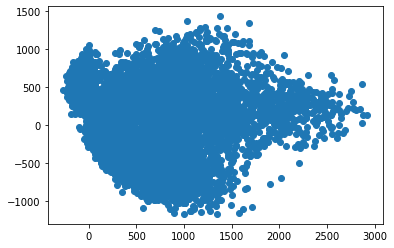

In [7]:
# Plotting code here
eig, vector = linalg.eig(np.cov(np.array(train_data).T))
eigvec1 = vector[:,0].T
eigvec2 = vector[:,1].T
plt.scatter(np.dot(eigvec1,train_data.T),np.dot(eigvec2,train_data.T))



## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [147]:
# Print accuracy on the test set using MLE
import math
covariance=np.array([None]*10)
covariance_inv=np.array([None]*10)
determinant = np.array([None]*10)
mean=np.zeros((10,784))
D=np.zeros((10,600,784))
lab=np.zeros((10,1))


#finding determminant and inverse for rank deficient matrix
for i in range(10):
    D[i,:,:] = train_data[train_labels ==i]
    mean[i]=np.mean(D[i],axis=0)
    covariance[i]=np.cov(data[i].T)
    eig1,eig2 = linalg.eig(covariance[i])
    #find zero values\
    
    d = np.diag(eig1)
    eig2 = np.real(eig2[:,0:linalg.matrix_rank(d)])
    determinant[i] = np.real(np.sum(np.log(eig1[:linalg.matrix_rank(d)])))
    covariance_inv[i]= eig2.dot(np.diag(1/np.real(eig1[0:linalg.matrix_rank(d)]))).dot(eig2.T)

    
count = 0
for i in range(1000):
    minim = np.inf
    num = 0
    for j in range(10):
        p = ((test_data[i]-mean[j]).dot(covariance_inv[j])).dot(test_data[i].T-mean[j].T)+determinant[j]
        minim,num = [p,j] if p<minim else [minim, num]
    if num == test_labels[i]:
        count=count+1

print('Accuracy', count/10)

    
    
    




        
   
    
#cov = np.cov(pdf)
#U,D,Vh = linalg.svd(cov)
#print (D)


    



Accuracy 74.2


In [148]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)
#assume prior distribution is the same, because we have same number of images for each label

import math
covariance=np.array([None]*10)
covariance_inv=np.array([None]*10)
determinant = np.array([None]*10)
mean=np.zeros((10,784))
D=np.zeros((10,600,784))
lab=np.zeros((10,1))


#finding determminant and inverse for rank deficient matrix
for i in range(10):
    D[i,:,:] = train_data[train_labels ==i]
    mean[i]=np.mean(D[i],axis=0)
    covariance[i]=np.cov(data[i].T)
    eig1,eig2 = linalg.eig(covariance[i])
    #find zero values\
    
    d = np.diag(eig1)
    eig2 = np.real(eig2[:,0:linalg.matrix_rank(d)])
    determinant[i] = np.real(np.sum(np.log(eig1[:linalg.matrix_rank(d)])))
    covariance_inv[i]= eig2.dot(np.diag(1/np.real(eig1[0:linalg.matrix_rank(d)]))).dot(eig2.T)

    
count = 0
for i in range(1000):
    minim = np.inf
    num = 0
    for j in range(10):
        p = ((test_data[i]-mean[j]).dot(covariance_inv[j])).dot(test_data[i].T-mean[j].T)+determinant[j]
        minim,num = [p,j] if p<minim else [minim, num]
    if num == test_labels[i]:
        count=count+1

print('Accuracy', count/10)


Accuracy 74.2


In [ ]:
# Print accuracy using Bayesian pairwise majority voting method

In [111]:
# Print accuracy using Simple Perpendicular Bisector majority voting method
D=np.zeros((10,600,784))
lab=np.zeros((10,1))
for i in range(10):
    D[i,:,:] = train_data[train_labels ==i]
mean=np.zeros((10,784))
for i in range(10):
    mean[i]=np.mean(D[i],axis=0)
#print (sum(means))
def L2(train_data, test_data):
    #vectorized implementation
    dist = np.sqrt(np.sum(a**2,axis=1)[:,np.newaxis] + np.sum(b**2,axis=1) - 2*a.dot(test_data.T))
    return dist
    
    
r=0
sum1 = 0
for i in range(1000):
    r = r+1
  
    x = 0
    a = 0
    b = 1
    label = 10
    dist = [0,0]
    
    while (x==0):
        
        dist = [linalg.norm(test_data[i]-mean[a]),linalg.norm(test_data[i]-mean[b])]
        #print (dist)
        if (b==9):
            if (dist[0]>dist[1]):
                label = b
            else:
                label = a 
            x = 1
        else:
            if (dist[1]>dist[0]):
                b = b+1
            else:
                a = b
                b = b+1
    if label == test_labels[i]:
        sum1 = sum1+1
    #print (label,int(test_labels[i]))
#print (sum1)
acc = sum1/10
print ("Accuracy:")
print (acc)        
        
    
                
                
            
        

Accuracy:
77.0


### 1.3.3 Question 4
Compare performances and salient observations

---
Your analysis here (double click to edit)
MAP and MLE have the same accuracy since we have assumed the prior distribution to be the same in MAP. We can come to this conclusion because of the fact that we have the same number of images for each class, making the probability of each class equally likely.

---

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [110]:
#Your code here
# Print accuracies with K = 1, 3, 7
def mode(a):
    (_, idx, counts) = np.unique(a, return_index=True, return_counts=True)
    index = idx[np.argmax(counts)]
    mode = a[index]
    return mode
    
def dist(train_data, test_data):
    dist = np.sqrt(np.sum(train_data**2,axis=1)[:,np.newaxis] + np.sum(test_data**2,axis=1) - 2*train_data.dot(test_data.T))
    return dist
def neighbour_gen(indices,train_labels,k):
    pred = np.zeros((k,1000))
    for i in range(1000):
        pred[:,i] =  train_labels[indices[:,i]][:k]
        
    return pred 
        
def accuracy(pred,train_labels,test_labels):
    #find the maximum element in the prediction list
    max_element = np.apply_along_axis(mode,0,pred)
    #find element with same test label
    element = (max_element == test_labels)
    summation = np.sum(element)
    acc = summation/1000
    return acc
    
    
    

def knn(train_data,train_labels,test_data,test_labels,k):
    
    dist1 = dist(train_data,test_data)
    indices = np.argsort(dist1,axis=0)
    #print (indices)
    pred = np.zeros((k,1000))
    acc = accuracy(neighbour_gen(indices,train_labels,k), train_labels,test_labels)
   
    
    return acc
print ("Accuracies for k =1,3,7 in order:") 
print (knn(train_data,train_labels,test_data,test_labels,1))
print (knn(train_data,train_labels,test_data,test_labels,3))
print (knn(train_data,train_labels,test_data,test_labels,7))
    


Accuracies for k =1,3,7 in order:
0.907
0.916
0.916


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
Your analysis here (double click to edit)
1. The accuracies are not the same since the decision boundary becomes smoother as we increase the value of k. This is because there are more neighbours to compare to in order to assign the correct class to the test data.

2. As we increase k to very large values, the model tends to underfit, i.e, it becomes simpler. But if k is too low, the model will overfit, and we will not get accurate results. In order to prevent this, we need to find a peak finding algorithm which will find the most optimal k. This can be accomplished by using binary search on the validation data vs k-value graph, which will allow for us to most optimally find the k value. Usually though, using k = sqrt(n/2) is a good place to  start from.
---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [ ]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
Your algorithm here (double click to edit)
We predict points by taking mean of labels of the K nearest neighbour. This is in contrast to the weighted function that can also be used to solve the given archetype of regression.
---

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [109]:
# Your code here
#Your code here
# Print error with K 1, 3, 7
def mode(a):
    (_, idx, counts) = np.unique(a, return_index=True, return_counts=True)
    index = idx[np.argmax(counts)]
    mode = a[index]
    return mode
    
def dist(train_data, test_data):
    #same as outer product, python broadcast for sum
    #vectorized form of kNN, for speed purposes
    dist = np.sqrt(np.sum(train_data**2,axis=1)[:,np.newaxis] + np.sum(test_data**2,axis=1) - 2*train_data.dot(test_data.T))
    return dist
def neighbour_gen(indices,train_labels,k):
    pred = np.zeros((k,1000))
    for i in range(1000):
        pred[:,i] =  train_labels[indices[:,i]][:k]
        
    return pred 
        
def error(pred,train_labels,test_labels):
    #find the maximum element in the prediction list
    mean_element = np.mean(pred,axis=0)
    #find element with same test label
    element = (mean_element - test_labels)
    abso = np.abs(element)
    summation = np.mean(abso)
    err = summation*100/1000
    return err
    
    
    

def regress(train_data,train_labels,test_data,test_labels,k):
    
    dist1 = dist(train_data,test_data)
    indices = np.argsort(dist1,axis=0)
    #print (indices)
    pred = np.zeros((k,1000))
    err1 = error(neighbour_gen(indices,train_labels,k), train_labels,test_labels)
   
    
    return err1
print ("Errors for k=1,,3,7 in order:")
print (regress(train_data,train_labels,test_data,test_labels,1))
print (regress(train_data,train_labels,test_data,test_labels,3))
print (regress(train_data,train_labels,test_data,test_labels,7))

Errors for k=1,,3,7 in order:
0.0354
0.03773333333333333
0.04377142857142857


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---